In [1]:
from features import extract_features
%matplotlib inline

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from features import extract_features
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Divide up into cars and notcars
vehicle_image_dir = 'vehicles/*/*.png'
nonvehicle_image_dir = 'non-vehicles/*/*.png'
cars = []
notcars = []

images = glob.glob(vehicle_image_dir)
for image in images:
    cars.append(image)
    
images = glob.glob(nonvehicle_image_dir)
for image in images:
    notcars.append(image)
    


In [3]:
print(len(cars))
print(len(notcars))

8792
8968


In [4]:
# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 5000
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
h_colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
s_colorspace = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, h_cspace=h_colorspace, s_cspace=s_colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, h_cspace=h_colorspace, s_cspace=s_colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

(44.63, 'Seconds to extract HOG features...')


In [5]:
print(len(car_features))

5000


In [6]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_val, y_train, y_val = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

('Using:', 9, 'orientations', 8, 'pixels per cell and', 2, 'cells per block')
('Feature vector length:', 8364)


In [7]:
print(len(X_train))
print(len(scaled_X))

8000
10000


In [8]:
from train_SVM import train_LinearSVC

In [9]:
Lin_clf = train_LinearSVC(X_train, y_train, X_val, y_val)

(3.2, 'Seconds to train SVC...')
('Test Accuracy of SVC = ', 0.9985)
('SVC predicts: ', array([ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.]))
('For these', 10, 'labels: ', array([ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.]))
(0.002, 'Seconds to predict', 10, 'labels with SVC')


In [11]:
import pickle

In [13]:
with open('X_scaler', 'w') as f:
    pickle.dump(X_scaler, f)

In [14]:
X_scaler2 = pickle.load(open('X_scaler', 'r'))

In [15]:
X_scaler2

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_scaler==X_scaler2

False

In [17]:
X_scaler.mean_ == X_scaler2.mean_

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [18]:
with open('Car_NoCar_LinearSVC', 'w') as f:
    pickle.dump(Lin_clf, f)

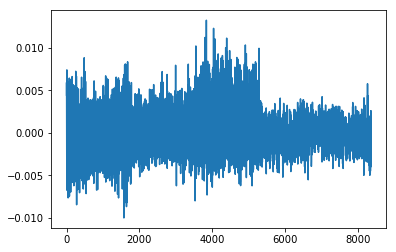

In [74]:
plt.plot(Lin_clf.coef_[0])
plt.show()

In [73]:
Lin_clf.coef_

array([[ 0.00442076,  0.00590068,  0.00222245, ..., -0.00399057,
        -0.00265901,  0.00253039]])